# Auditoría 2: Estudio Temporal de las Lineas

In [84]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as mdates

from pyspark import SparkContext, SQLContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *


sqlCtx = SQLContext(sc)

## 1. Estudio Temporal de una Linea

### 1.1. Carga de Datos

In [85]:
# Linea1 (mes,dia_semana y tramos)
df_meses_linea1 = sqlContext.sql("SELECT mes,SUM(n_viajeros) as suma FROM emt_smartbus.viajeros_tramos_master_nooutliers where linea=1 group by mes")
df_dias_linea1 = sqlContext.sql("SELECT dia_semana,SUM(n_viajeros) as suma FROM emt_smartbus.viajeros_tramos_master_nooutliers where linea=1 group by dia_semana")
df_tramos_linea1 = sqlContext.sql("SELECT tramo,SUM(n_viajeros) as suma FROM emt_smartbus.viajeros_tramos_master_nooutliers where linea=1 group by tramo order by tramo")

# Linea N1 
df_meses_lineaN1 = sqlContext.sql("SELECT mes,SUM(n_viajeros) as suma FROM emt_smartbus.viajeros_tramos_master_nooutliers where linea=501 group by mes")
df_dias_lineaN1 = sqlContext.sql("SELECT dia_semana,SUM(n_viajeros) as suma FROM emt_smartbus.viajeros_tramos_master_nooutliers where linea=501 group by dia_semana")
df_tramos_lineaN1 = sqlContext.sql("SELECT tramo,SUM(n_viajeros) as suma FROM emt_smartbus.viajeros_tramos_master_nooutliers where linea=501 group by tramo order by tramo")


### 1.2. Plot meses Linea 1 y N1

In [86]:
mes_ = [1,2,3,4,5,6,7,8,9,10,11,12]
suma_meses_linea1 = [float(i.suma) for i in df_meses_linea1.select('suma').collect()]
suma_meses_lineaN1 = [float(i.suma) for i in df_meses_lineaN1.select('suma').collect()]

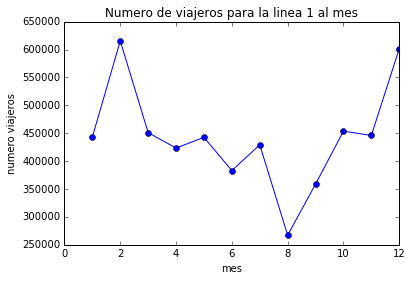

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(mes_,suma_meses_linea1,'b')
plt.plot(mes_,suma_meses_linea1,'bo')
plt.title('Numero de viajeros para la linea 1 al mes')

plt.xlabel('mes')
plt.ylabel('numero viajeros')
plt.show()

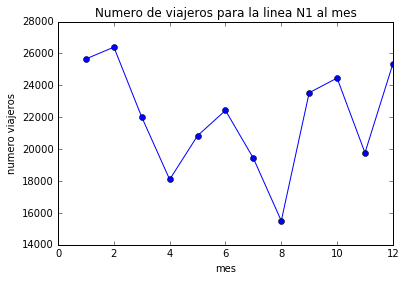

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(mes_,suma_meses_lineaN1,'b')
plt.plot(mes_,suma_meses_lineaN1,'bo')
plt.title('Numero de viajeros para la linea N1 al mes')

plt.xlabel('mes')
plt.ylabel('numero viajeros')
plt.show()

### 1.3. Plot dias semana Linea 1 y N1

In [89]:
d_semana = ['L','M','X','J','V','S','D']
suma_dias_linea1 = [float(i.suma) for i in df_dias_linea1.select('suma').collect()]
suma_dias_lineaN1 = [float(i.suma) for i in df_dias_lineaN1.select('suma').collect()]

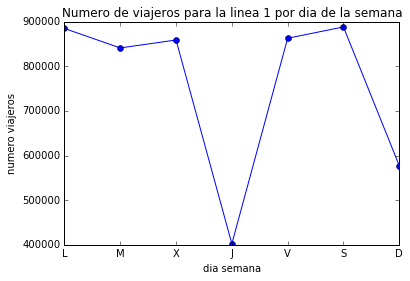

In [90]:
days=[1,2,3,4,5,6,7]
plt.xticks(days, d_semana)
plt.plot(days, suma_dias_linea1,'b')
plt.plot(days, suma_dias_linea1,'bo')
plt.title('Numero de viajeros para la linea 1 por dia de la semana')

plt.xlabel('dia semana')
plt.ylabel('numero viajeros')
plt.show()

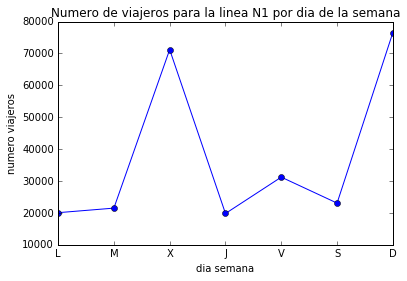

In [91]:
days=[1,2,3,4,5,6,7]
plt.xticks(days, d_semana)
plt.plot(days, suma_dias_lineaN1,'b')
plt.plot(days, suma_dias_lineaN1,'bo')
plt.title('Numero de viajeros para la linea N1 por dia de la semana')

plt.xlabel('dia semana')
plt.ylabel('numero viajeros')
plt.show()

### 1.4. Plot tramos Linea 1 y N1

In [92]:
tramo_linea1 = [int(i.tramo) for i in df_tramos_linea1.select('tramo').collect()]
tramo_lineaN1 = [int(i.tramo) for i in df_tramos_lineaN1.select('tramo').collect()]

suma_linea1 = [float(i.suma) for i in df_tramos_linea1.select('suma').collect()]
suma_lineaN1 = [float(i.suma) for i in df_tramos_lineaN1.select('suma').collect()]

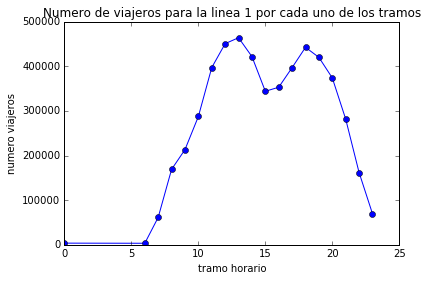

In [93]:
plt.plot(tramo_linea1, suma_linea1,'b')
plt.plot(tramo_linea1, suma_linea1,'bo')
plt.title('Numero de viajeros para la linea 1 por cada uno de los tramos')

plt.xlabel('tramo horario')
plt.ylabel('numero viajeros')
plt.show()

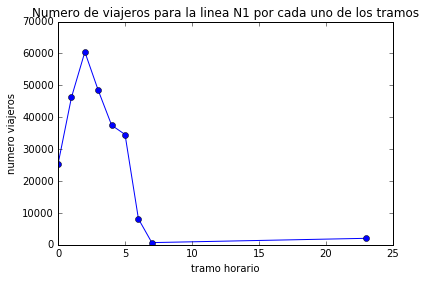

In [94]:
plt.plot(tramo_lineaN1, suma_lineaN1,'b')
plt.plot(tramo_lineaN1, suma_lineaN1,'bo')
plt.title('Numero de viajeros para la linea N1 por cada uno de los tramos')

plt.xlabel('tramo horario')
plt.ylabel('numero viajeros')
plt.show()